# Week 5: Classes, objects, methods and all that

## Introduction

Remember the very first line of code we ran in the first class? It went something like...  
> int_number = 56

It looks very simple. We tell the Python interpreter (just a fancy name given to programs that run code, like "python3" in your command line) to create the variable name int_number and assign to it 56. A variable is just a little chunk of the computer's memory reserved to store its name and a pointer to another piece of memory where its value is. But there's a catch: in Python, 56 is not simply an integer (or a chunk of memory containing the equivalent binary number 111000). It turns out that you've been using objects since the very beginning. 

In languages like C or Fortran, variables are very simple chunks of memory containing just the bare minimum information about it. In Python, everything is an object. An int is an object. When you type int_number = 56, Python instantiates an object of the class int and uses the name int_number to refer to this object. So what are classes? And what does instantiating an object mean? Why is there a distinction between methods and functions? And what are user-defined classes good for?

First of all, are classes necessary for programming? In principle no. You can live your life without ever touching a class statement. But here are some reasons why it can be useful to know a bit about them. Here's a (not exhaustive) list of reasons:

- Conceptually, it can be easier to think in terms of classes;
- Since everything is an object in Python... well, it helps to know where they come from;
- If you write code, you read code and use other people's code. And most libraries are built around classes. The reason is that classes can be handy to keep large projects organized. So to understand other people's codes, you will most certainly need to know a minimum about classes;

In this lecture, we will explore classes and patch clamp recordings simultaneously. Keep in mind that we are using classes for this analysis for pedagogical reasons. In practice, this approach may not be the most suited for the task.

*** The data included in this notebook was obtained in the von Gersdorff Lab at the Vollum Institute and remains unpublish. Please do not distribute it. ***

If you'd like to learn more about the recordings shown here, refer to Zemel et. al., 2023. _Motor cortex analogue neurons in songbirds utilize Kv3 channels to generate ultranarrow spikes_. eLife 12:e81992.

## Interlude: Patch clamp recordings

The goal of this lecture is two-fold. We will learn about classes and we will implement a class that handles feature extraction from voltage clamp and current clamp recordings. 

We'll start by loading and taking a quick peak at the data. The first recording is from a patch clamp experiment in cell attached mode, where the voltage is fixed at zero. All recordings were done using a sampling rate of 71400Hz.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 71400

cell_attached = np.load('cell_attached.npy')
t_attached = np.arange(len(cell_attached))/float(sampling_rate)

plt.plot(t_attached, cell_attached)
plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

The second recording was done after breaking into the cell's membrane and by fixing the current at zero.

In [ ]:
whole_cell = np.load('whole_cell.npy')
t_whole = np.arange(len(whole_cell))/float(sampling_rate)

plt.plot(t_whole, whole_cell)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')

But first, classes 101.

## The class statement

The simplest class that you can create in Python is very simple:

In [ ]:
class MyFirstClass:
    pass

In the statement above, we defined a class called MyFirstClass. Note that the syntax is in some ways similar to how functions are defined, except that here I did not include any argument in parenthesis after MyFirstClass. More on that later. 

The "pass" statement simply tells Python to not do anything in the class scope.

We can now create objects with our new class. Note that the when objects are instantiated, the syntax requires parenthesis:

In [ ]:
not_my_first_object = MyFirstClass()

So what's contained in not_my_first_object? 

In [ ]:
dir(not_my_first_object)

Alot of stuff. But what stands out is how every string above starts and ends with a double undescore, "__". These are called magic methods, and they are one of the wonders of Python. But to avoid being circular, first we need to know what a method is. 

## Methods

A method is a function defined within the scope of a class. In fact, the syntax for method definition is essentially the same as for functions. Let's create a slightly more interesting class, add a method to it and try it out:

In [ ]:
class NeuronalRecording:
    
    def quantity(self):
        return 'Voltage (mV)'

    
N = NeuronalRecording()
N.quantity()

There are many details hiding in this simple example. First, the pass statement is gone since we now have something else (a method) inside the class definition. 

Second, the method "quantity" requires an argument, which I called "self". If you don't define at least one argument to a method, you'll get an error message. However, when I called "quantity" using the object "N", I did include the argument "self". Why?

You could've used any name for this argument, but "self" is a convention that virtually everyone uses. Behind the curtains, when you create a new object, the dot notation for class calls, e.g. N.quantity(), means the following:

In [ ]:
NeuronalRecording.quantity(N)

So we are actually calling the method from the class definition and passing the object we created to it! "self" refers to the object. In practice we always use the dot notation. 

Even in Numpy, when we call, for example:

In [ ]:
fibo = np.array([0,1,1,2,3,5])

fibo.sum()

we are actually creating a numpy array object and passing it to the method "sum". But, as we just learned, we could've done

In [ ]:
np.ndarray.sum(fibo)

with the slightly difference that here the class is actually called ndarray (np.array is just a function that returns an object of the type np.ndarray).

What's inside the object N? 

In [ ]:
dir(N)

As expected, all the magic methods that we saw before (the methods containing two underscores), in addition to the method we defined, "quantity".

## The \__init__ method

There is one magic method that is of absolute importance, and that's the \__init__ method. Plainly speaking, \__init__ initializes an object. It's a method that gets automatically called when you create an object. Let's try it out by redefining our NeuronalRecording class:

In [ ]:
class NeuronalRecording:

    def __init__(self, vm):
        self.vm = vm
        self.spikes = []
    
    def quantity(self):
        return 'Voltage (mV)'
    
N = NeuronalRecording(vm=whole_cell)
N.quantity()

In addition to the good old "self" argument, I also added a new argument "vm", a placeholder for the membrane potential, in the same manner we normally do when defining functions.

Notice now the next two lines. Here's when things start getting interesting. "self.vm" is now a variable that will be assigned to the "self" object when we instantiate the class "NeuronalRecording". 

All this jargon is complicated, but what it really means is that our "NeuronalRecording" object, "N", now has a variable called "vm" and it's value is a numpy array.

In [ ]:
print(N.vm)

And we also have a variable that was assgined by the class itself:

In [ ]:
print(N.spikes)

Most importantly, these quantities are bound to object N's scope. This is very important because we can now create many instances at once, each with a different set of "vm" and "spikes" values. For example:

In [ ]:
vm1 = whole_cell[:len(whole_cell)//2]
vm2 = whole_cell[len(whole_cell)//2:]

N1 = NeuronalRecording(vm1)
N2 = NeuronalRecording(vm2)

print(N1.vm)
print(N2.vm)

You can also change these variables even after initialization. Let's flip them:

In [ ]:
N1.vm = vm2
N2.vm = vm1

print(N1.vm)
print(N2.vm)

## Exercise 1

To find individual spikes in whole-cell recordings, we need to locate where in the signal the membrane potential exceeds some threshold value. From eye inspection, 0mV seems like a good threshold value. Since our recordings are in a numpy array, we can use the following syntax:

In [ ]:
threshold = 0
spike_indicator = (whole_cell>threshold)

print(spike_indicator)

Using this idea, create a class "NeuronalRecording" and define a method "spike_indicator" that takes the membrane potential "vm" and a new variable called "threshold" as argument and implements the following operation:

spikes = True, if vm >= threshold

spikes = False, if vm < threshold

In [ ]:
#Answer

class NeuronalRecording:
    
    def __init__(self, vm, threshold):
        self.vm = vm
        self.threshold = threshold
        self.spikes = []
        
    def spike_indicator(self, vm):        
        return (vm>=threshold)
        
    def quantity(self):
        return 'Voltage (mV)'

N = NeuronalRecording(whole_cell, threshold)
N.spike_indicator(whole_cell)

To check our work so far, let's plot a masked version of the recording:

In [ ]:
masked = np.ma.array(whole_cell, mask=~N.spike_indicator(whole_cell))
plt.plot(t_whole, masked)

### Bonus question

How does the first line in the cell above work? To answer this question you will need to read the documentation of np.ma.array:

In [ ]:
np.ma.array?

## Inheritance

In our previous examples, the class NeuronalRecording was designed for current clamp experiments. It even has the physical quantity embedded in it. 

In voltage clamp the units are given in nanoampere. But aside from that difference, we can still measure properties from action potentials much in the same way. We could define two classes: one for voltage clamp and another for current clamp, both with the same set of methods, but slightly different "quantity" method.

A better solution is to make the problem slightly more abstract. First we create a generic NeuronalRecording class that doesn't specify the measurement type:

In [ ]:
class NeuronalRecording:
    
    def __init__(self, trace, threshold):
        self.trace = trace
        self.threshold = threshold
        self.spikes = []
        
    def spike_indicator(self, trace):        
        return (trace>=threshold)
        
    def quantity(self):
        return ''

Where instead of "vm", I used the word "traces" to indicate that it represents a generic type of trace.

Now comes the trick: inheritance. Classes can be inherited from other classes. Here's a simple example of how this looks like in practice:

In [ ]:
class A:
    
    def a_method(self):
        print('a')
        
class B(A):
    
    def b_method(self):
        print('b')
    
object_b = B()

object_b.a_method()
object_b.b_method()

Class B takes A as an argument and that gives B access to everything that class A can do! A is the base class of B. In fact, remember our very first class, "MyFirstClass"? It turns out that not passing any argument in the definition is equivalent to:

In [ ]:
class MyFirstClass(object):
    pass

"object" in Python is special class. Implicitly, every class is a subclass of "object". This gets a bit confusing, so we are going to stop this discussion here. The main message is that classes can be nested like russian dolls.

Another neat trick in Python is that subclasses can "overwrite" methods from the base class without affecting the base class whatsoever:

In [ ]:
class C(A):
    
    def a_method(self):
        print('c')
        
        
object_c = C()
object_c.a_method()

object_a = A()
object_a.a_method()

## Exercise 2

Use our abstracted class for neuronal recordings, NeuronalRecording, as the base class to define two new classes: one for cell-attached voltage clamp recordings, and another for whole-cell current clamp recordings. Name these classes VoltageClampRecording and CurrentClampRecording, respectivelly.

In [ ]:
#Answer

class VoltageClampRecording(NeuronalRecording):
    
    def quantity(self):
        return 'Current (nA)'
    
    
class CurrentClampRecording(NeuronalRecording):
    
    def quantity(self):
        return 'Voltage (mV)'

Now you might be getting a sense of why classes are so helpful to organize code. You don't need to define twice a methods that is used in two different classes. The classes can simply share the same method!

In [ ]:
whole_threshold = 0
CC = CurrentClampRecording(whole_cell, whole_threshold)

print(CC.quantity())

In [ ]:
attached_threshold = 0.2
VC = VoltageClampRecording(cell_attached, attached_threshold)

print(VC.quantity())

## Segmenting spikes

Going back to our goal, before extracting features from those action potentials, we first need to average them.

Luckily, APs can be very stereotypical, which simplifies our analysis a lot! All we need to do is average segments of the traces containing APs. Our first task is to find the AP peak times in these traces.

Our "spike_indicator" method returns True whenever the membrane potential is above the threshold we stablished, and False otherwise:

In [ ]:
spks = CC.spike_indicator(whole_cell)
print(spks)

This means that at the points where the threshold is crossed, the value of spks changes either from True to False or from False to True. We can exploit that to find the segments where the action potential peaks are located in an elegant way.

In [ ]:
flips = (spks[1:] != spks[:-1])
segment_indices = np.where(flips)[0]
segment_starts = segment_indices[::2]
segment_ends = segment_indices[1::2]

Here's the logic behind the code above:
- mark as True the points where the array spks flips from True to False and vice versa;
- find the indices of these points using np.where;
- the start points hop every two elements
- the end points are the indices following the start points

## Exercise 3

For each segment we now find the index where the membrane potential is the highest. These points should correspond to the AP peaks. This will now involve a for loop. 

Complete the code below: calculate the spike peak indices in the whole_cell array and save them in an array called "peaks".

In [64]:
peaks = []
for start, end in zip(segment_starts, segment_ends):
    peak_idx = whole_cell[start:end].argmax()+start #answer in this line
    peaks.append(peak_idx)

As a sanity check, let's plot the whole-cell trace again as well as the peaks:

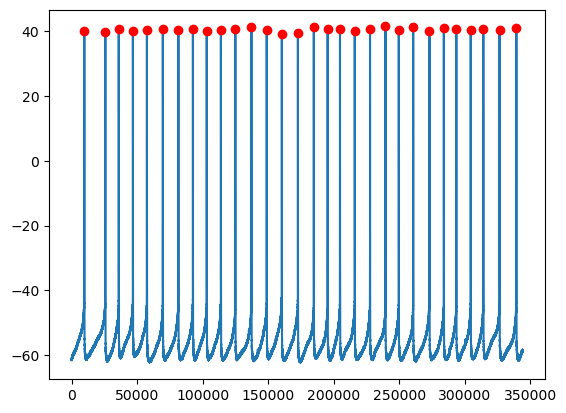

In [65]:
plt.plot(whole_cell)
plt.plot(peaks, whole_cell[peaks], 'or')

Finally, we fix a range of points centered at the peak times and segment those intervals out of the whole_cell array. Instead of writting a new routine, let's rewrite the previous for loop. The size of each segment will be 2048.

In [66]:
segment_size = 2048

aps = []
for start, end in zip(segment_starts, segment_ends):
    peak_idx = whole_cell[start:end].argmax()+start
    ap = whole_cell[peak_idx-segment_size//2:peak_idx+segment_size//2]
    aps.append(ap)

Averaging all the APs and finally plotting:

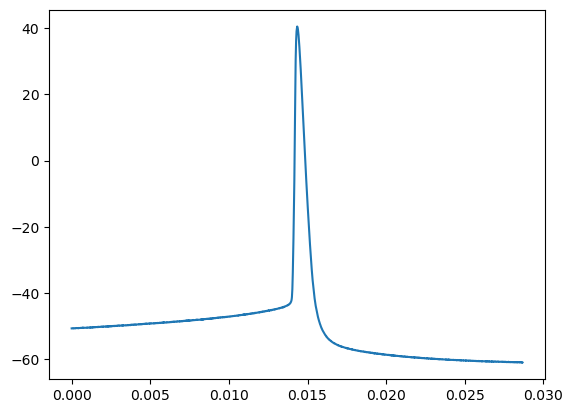

In [67]:
avg_ap = np.mean(aps, axis=0)
t_ap = np.arange(len(avg_ap))/float(sampling_rate)

plt.plot(t_ap, avg_ap)

## Putting it all together

Phew, that was hardwork. But now we know we can package all this code in a class and reuse it for the cell attached recording. 

Take some time reading through the logic behind this class. There are several modifications from the previous version.

In [ ]:
class NeuronalRecording:
    
    def __init__(self, trace, threshold):
        self.trace = trace
        self.threshold = threshold
        self.segment_size = 2048
        self.spikes = self.segment(trace)

    def segment(self, trace):
        spks = self.spike_indicator(trace)
        
        flips = (spks[1:] != spks[:-1])
        segment_indices = np.where(flips)[0]
        segment_starts = segment_indices[::2]
        segment_ends = segment_indices[1::2]

        aps = []
        for start, end in zip(segment_starts, segment_ends):
            peak_idx = trace[start:end].argmax()+start
            ap = trace[peak_idx-self.segment_size//2:peak_idx+self.segment_size//2]
            aps.append(ap)
        return aps
        
    def spike_indicator(self, trace):        
        return (trace>=threshold)

    def independent_quantity(self):
        return 'Time (s)'
        
    def quantity(self):
        return ''

Of course, we also need to define again our subclasses:

In [ ]:
class VoltageClampRecording(NeuronalRecording):

    def quantity(self):
        return 'Current (nA)'
    

class CurrentClampRecording(NeuronalRecording):
    
    def quantity(self):
        return 'Voltage (mV)'

From our plots of the voltage clamp recordings, 0.2 nA seems like a reasonable threshold.

In [ ]:
cc_threshold = 0.2
VC = VoltageClampRecording(cell_attached, cc_threshold)

vc_threshold = 0.0
CC = CurrentClampRecording(whole_cell, vc_threshold)

In [ ]:
t_ap = np.arange(len(avg_ap))/float(sampling_rate)
plt.plot(t_ap, np.mean(CC.spikes, axis=0))

plt.xlabel(CC.independent_quantity())
plt.ylabel(CC.quantity())

In [ ]:
plt.plot(t_ap, np.mean(VC.spikes, axis=0))
plt.xlabel(VC.independent_quantity())
plt.ylabel(VC.quantity())

## Measuring features

For the grand finale, we will calculate some AP properties using the whole-cell recordings:
- AP peak;
- Maximum depolarization and repolarization rates;
- AP threshold;
- AP half-width;

We will describe each property first and at the end put it all together in our classes.

In [ ]:
spikes = np.array(CC.spikes)

### Peak values

The AP peak is simply the maximum voltage reached by th AP. That's simple, we can use numpy's max function:

In [ ]:
peaks = np.max(spikes, axis=1)
print('AP peak = %f +- %f mV'%(peaks.mean(), peaks.std()))

### Depolarization and repolarization rates

Both quantities refer to the rate of change of voltage in time. We can calculate it using the slope between each pair of points. 

_Warning: In practice, never calculate the slope in this way before filtering your data!_

In [ ]:
slope = (spikes[:, 1:]-spikes[:, :-1])*sampling_rate/1000.

max_depols = np.max(slope, axis=1)
max_repols = np.min(slope, axis=1)

print('Max. depol. rate = %f +- %f mV'%(max_depols.mean(), max_depols.std()))
print('Max. repol. rate = %f +- %f mV'%(max_repols.mean(), max_repols.std()))

### Bonus question

Compare the average slope of the action potential with the cell attached recording in the figures below. 

In [ ]:
plt.plot(-np.mean(slope, axis=0))

In [ ]:
plt.plot(t_ap, np.mean(VC.spikes, axis=0))

Why are the two so similar? Is this a coincidence?

### AP Threshold

Zemel et. al., 2023 defines AP threshold as the voltage value when the depolarization rate reaches 10 V/s. Instead of finding where the slope hits 10 V/s, we will find when it is the _closets_ to 10 V/s. The trick for that is to find where the absolute value of slope-10 is the minimum!

In [ ]:
idxs = np.argmin(np.abs(slope-10), axis=1)

ths = []
for ap, idx in zip(spikes, idxs):
    ths.append(ap[idx])
ths = np.array(ths)

print('Threshold = %f +- %f mV'%(ths.mean(), ths.std()))

### Half-width

The AP half-width is the width of the AP at the mid voltage between the threshold and the peak. First we need to find the points when this condition is met, which we can calculate by subtracting the peak from the threshold and halving the result. 

In [ ]:
mid_volt = (ths-peaks)*0.5
mid_volt = mid_volt[:, np.newaxis]

idxs_depol = np.argmin(np.abs(spikes[:, :1024]-mid_volt), axis=1)
idxs_repol = np.argmin(np.abs(spikes[:, 1024:]-mid_volt), axis=1)

hws = (idxs_repol-idxs_depol)/float(sampling_rate)

print('HW = %f +- %f'%(hws.mean(), hws.std()))

## Final Exercise

Put everything together in the definition of the class VoltageClampRecording and write a method that returns a summary of all AP properties.


## Other stuff that we skipped over

If you feel like learning more, here's a non-comprehensive list of things we skipped over but that can be very handy in practice and you might find very often in the wild:
- The class super;
- Some useful decorators, such as @property, @classmethod, and @staticmethod;
- Multiple inheritances;
- Class/static variables;
- Other useful magic methods, like \__repr__
  